# Wine Quality Prediction—Classification

## Importing Libraries and Helper Functions

### Libraries

In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Helper Functions

## Load the Data

In [2]:
data = pd.read_csv('../datasets/raw/white_wine.csv', delimiter=';')

# Display the first 5 rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA: Overveiw

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.duplicated().sum()

937

## Data Cleaning

In [6]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Verify if there are no duplicates
data.duplicated().sum()

0

## Data Preprocessing

In [8]:
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Random Forest

In [9]:
# Initialize Random Forest Regressor model
rfr_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfr_model.fit(X_train, y_train)

# Predict the target values
y_pred = rfr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.5296343001261034
Mean Squared Error: 0.6532156368221942
R^2 Score: 0.20351885460778385


#### Actual vs Predicted

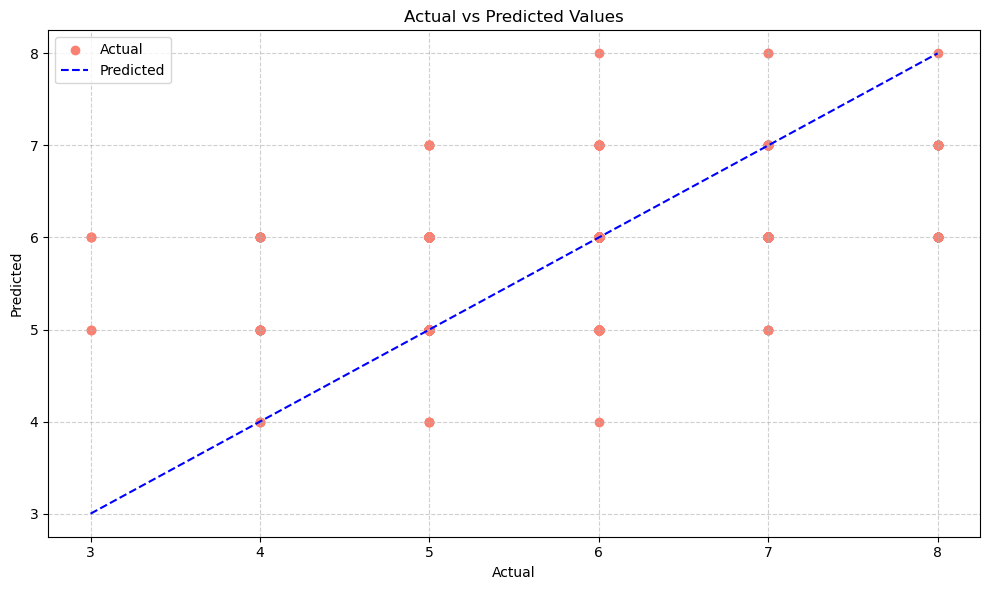

In [14]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.scatter(y_test, y_pred, color='salmon', label='Actual')

# Plot the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Predicted')

# Set the labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Display the legend
plt.legend()

# Add grid lines
plt.grid(linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

#### Residual Analysis

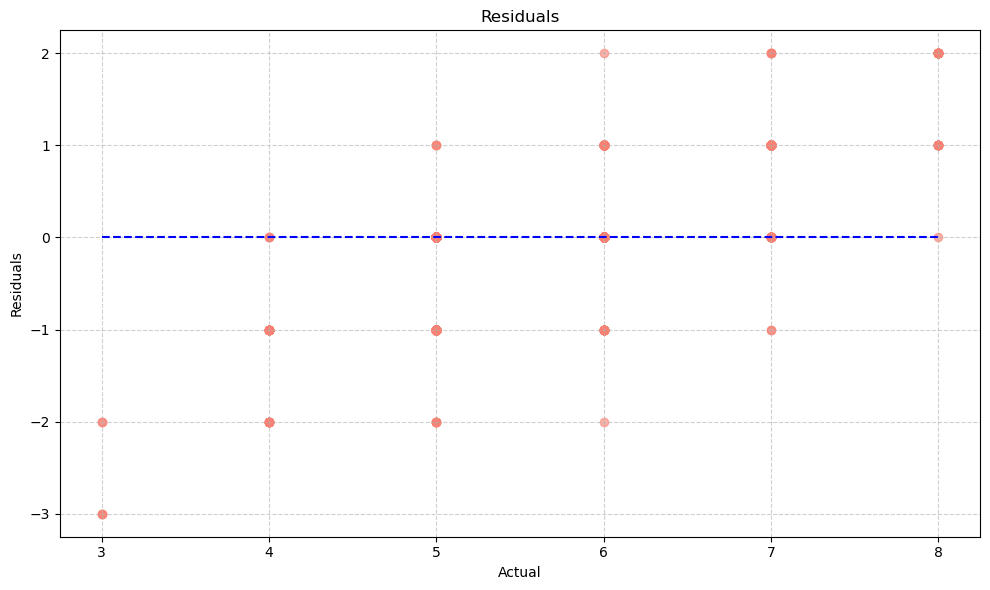

In [15]:
# Calculate residuals
residuals = y_test - y_pred

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the residuals
plt.scatter(y_test, residuals, color='salmon', alpha=0.6)

# Horizontal line at y = 0
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='blue', linestyle='--')

# Set the labels and title
plt.title('Residuals')
plt.xlabel('Actual')
plt.ylabel('Residuals')

# Add grid lines
plt.grid(linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

#### Cumulative Explained Variance (R2)

In [16]:
# Cumulative explained variance
cumulative_explained_variance = rfr_model.score(X_test, y_test)

print(f'Cumulative Explained Variance: {cumulative_explained_variance}')

Cumulative Explained Variance: 0.5283732660781841


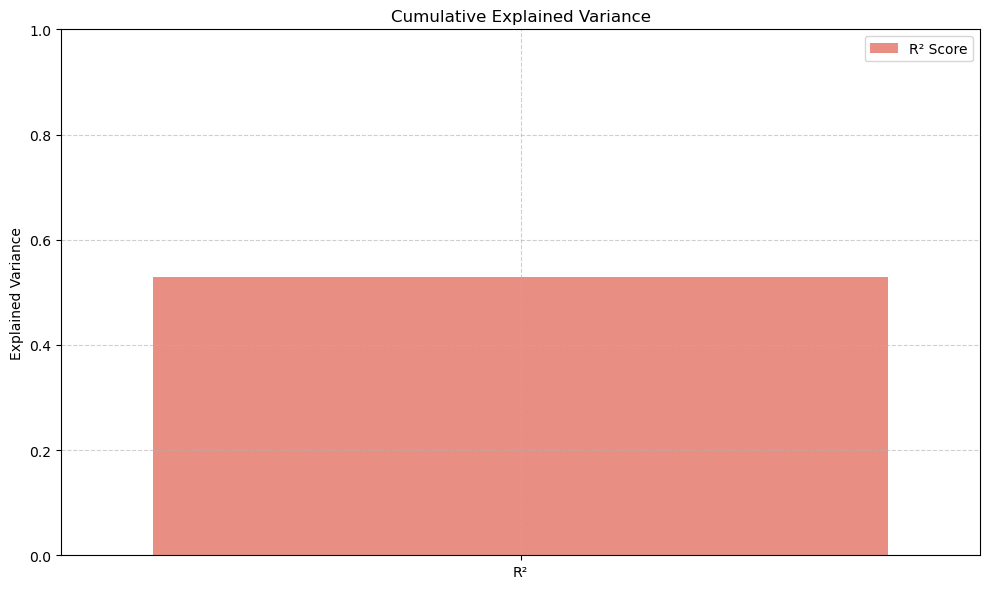

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the R2 score
sns.barplot(x=['R²'], y=[cumulative_explained_variance], color='salmon', label='R² Score')

# Set the labels and title
plt.title('Cumulative Explained Variance')
plt.ylabel('Explained Variance')
plt.ylim(0, 1)

# Add grid lines
plt.grid(linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()